# **<font color='green'>Option 2: Find plagiarism with Counting Bloom Filters</font>**

## Python Implementation of CBF

In [4]:
import numpy as np
import math

class CountingBloomFilter():
    """
    Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter
    """
    def __init__ (self, num_items, fpr = 0.02, num_hashfn = 0):
        """
        - num_items: int, number of items stored
        - fpr: float, false-positive rate
        - num_hashfn: int, number of hash functions
        """
        #initialize an empty CBF
        self.num_items = 0
        self.memory_size = int(- 1.44 * num_items  * np.log2(fpr) / np.log2(2)) 
        self.bit_array = [0] * self.memory_size
        
        # Assign 0.02 for fpr, if not specified
        if fpr > 0:
            self.fpr = fpr
        else:
            fpr = 0.02
        
        # Initialize an optimal number of hash functions, if not specified 
        if num_hashfn == 0:
            if int(-np.log2(fpr)) > 0:
                self.num_hashfn = int(round(-np.log2(fpr)))
            else:
                self.num_hashfn = 1
        else:
            self.num_hashfn = num_hashfn
    
    def hash_function(self, item, i):
        """
        Convert a string to an integer 
        representation for hashing

        Parameters
        ----------
        item: str
            the input string that needs to be hashed
        i: int
            the i-th hash function we are hashing

        Returns
        ----------
        hash_index: int
            the integer value to be used for the final hash
        """
        #"prime" number changes with different i 
        prime = 2 ** i
        
        hash_index = 0
        
        # For every character in the input text
        for char in range(len(item)):
            
            # hash calculation based on character
            int_char = ord(item[char]) * (prime ** char) 
            hash_index = (hash_index + (int_char ** 2)) % self.memory_size 
        
        return hash_index
    
    def hash_cbf(self, item):
        """
        Returns hash values of an item
        Parameter 
        ----------
        item: string
            the input string that needs to be hashed
        Returns
        ----------
        hash_values: list
            list of hash values each indicates the element in the filter
        """
        hash_values = []
        
        # Perform hash calculations based on the number of hash functions
        for i in range(self.num_hashfn):
            hash_index = self.hash_function(item, i)
            hash_values.append(hash_index)
            
        return hash_values
 
    def search(self, item):
        """
        Judges whether the queried value is stored in the filter or not
        Parameter
        ----------
        item: string
            the data of query
        Returns
        ----------
        True/False: boolean
            Returns False if the item definitely doesn't exist. Otherwise, return True.
        """
        # if any of the element in the filter is 0,
        for i in self.hash_cbf(item):
            if self.bit_array[i] == 0: 
                return False
        
        # all elements are more than zero
        # item likely to exist
        return True

    def insert(self, item):
        """
        Includes the item into the filter
        Parameter
        ---------
        item: string
            the data that needs to be added to the filter
        Returns
        ---------
        None
        """
        # perform hashing to the item
        for i in self.hash_cbf(item):
            
            # increase the count of suggested element
            self.bit_array[i] += 1 
            
        self.num_items += 1

    def delete(self, item):
        """
        Removes the item from the filter
        Parameter
        ---------
        item: string
            the data that needs to be removed from the filter
        Returns
        ---------
        None
        """
        # perform hashing to the item
        for i in self.hash_cbf(item): 
            
            # decrease the count if the item exists
            if self.bit_array[i] > 0: 
                self.bit_array[i] -= 1 
                
        self.num_items -= 1

In [5]:
#import text data
from requests import get
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'


def get_txt_into_list_of_words(url):
    '''
    Cleans the text data
    Parameter
    ----------
    url : string
        The URL for the txt file
        
    Returns
    -------
    data_just_words_lower_case: list
        List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(
        c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [
        word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case


version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)

## Test cases

In [6]:
# Create a small CBF with num_items = 10
cbf = CountingBloomFilter(10)

assert(cbf.hash_cbf("cs110") == cbf.hash_cbf("cs110")) #same output
assert(cbf.hash_cbf("cs111") != cbf.hash_cbf("cs110")) #one character change
assert(cbf.hash_cbf("cs110") != cbf.hash_cbf("Cs110")) #capitalization
assert(cbf.hash_cbf("*") != cbf.hash_cbf("+")) #special character
assert(cbf.hash_cbf("-123456") == cbf.hash_cbf("-123456")) #numbers

print("All test cases passed!")

All test cases passed!


In [7]:
from random import shuffle

# words to be added
word_present = ['apple', 'banana',
				'banoffe', 'barbeque', 'custard',
				'cucumber', 'dates', 'eggs',
				'eclair', 'edamame',
				'falafel', 'fennel', 'goat cheese',
				'gnocchi', 'haddock',
				'herring', 'hot dog', 
				'icing', 'j']

# words not added
word_absent = ['blueberry', 'nanana', 'Banana',
			'ehhs', 'kam',
			'eclsir', 'esamame', 'ising',
			'hotdong', 'date',
			'gnochi', 'herrring', 'joat cheese', 'd']

# words to be deleted
word_remove = ['apple', 'fennel', 'ice cream', 'carrot']

# initializing CBF 
cbf = CountingBloomFilter(num_items = 20)
print("initial CBF: ", cbf.bit_array)

#insert the words
for item in word_present:
    cbf.insert(item)
print("inserted CBF: ", cbf.bit_array)

#remove the words
for item in word_remove:
    cbf.delete(item)    
print("deleted CBF: ", cbf.bit_array)

#shuffle the words
shuffle(word_present)
shuffle(word_absent)

#prepare test case
test_words = word_present[:10] + word_absent
shuffle(test_words)
fp = 0

for word in test_words:
    if cbf.search(word):
        #if an absent word was detected in search, false-positive case
        if word in word_absent:
            fp += 1
            print("'{}' is a false positive!".format(word))

#print the false positive
print("Found ", fp, " false postive case in testing ", len(test_words), "words.")

initial CBF:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inserted CBF:  [0, 1, 0, 1, 3, 1, 0, 0, 1, 2, 1, 0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 2, 0, 1, 1, 1, 3, 1, 2, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 

## Evaluating hash functions

Collisions: 0 out of 2228 words (0.0%)


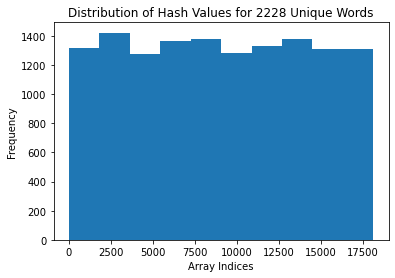

In [8]:
import matplotlib.pyplot as plt

def hashv_dist(data):
    """
    Visualize the distribution
    of hash values for the specified
    list of words

    Parameter
    ----------
    data: list
        words to hash

    Returns
    -------
    None
        shows the histogram of hash value distribution
    """
    # Initialize variables and CBF
    data_length = len(data)
    cbf = CountingBloomFilter(data_length)
    all_hash_fingerprints = []
    all_indices = []
    num_collisions = 0

    for word in data:
        # Store all hash values for every word
        hashes = cbf.hash_cbf(word)
        all_indices += hashes
        
        # Store collisions in the hash values
        if hashes in all_hash_fingerprints:
            num_collisions += 1
        
        all_hash_fingerprints.append(hashes)

    print("Collisions:", num_collisions, 
        f"out of {data_length} words ({num_collisions/data_length}%)")

    plt.hist(all_indices)
    plt.xlabel("Array Indices")
    plt.ylabel("Frequency")
    plt.title( f"Distribution of Hash Values for {data_length} Unique Words")
    plt.show()
    
# Visualize Version 1 with optimal number of hash functions
# using set() to eliminate overlapping words in the text data
hashv_dist(set(version_1))

## Memory size and False Positive Rate (FPR)

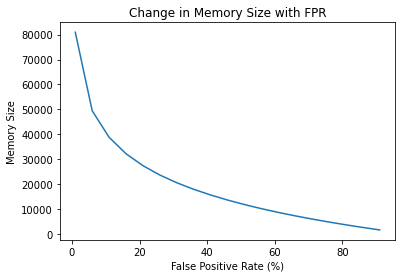

In [6]:
import matplotlib.pyplot as plt

def fpr_vs_memory_size(data):
    """
    Visualize change in memory size 
    with increasing FPR

    Parameter
    ----------
    data: list
        the dataset to test on

    Returns
    -------
    None
        visualizes the relationship between the two variables
    """
    data_length = len(data)
    memory_sizes = []
    fprs = []
    fpr = 0.01

    while fpr < 0.95:
        #create CBF
        cbf = CountingBloomFilter(data_length, fpr = fpr) 
        # track memory size
        memory_sizes.append(cbf.memory_size) 
        #store the fpr
        fprs.append(fpr * 100) 
        #increment fpr by 5%
        fpr += 0.05 
    
    plt.plot(fprs, memory_sizes)
    plt.xlabel("False Positive Rate (%)")
    plt.ylabel("Memory Size")
    plt.title("Change in Memory Size with FPR")
    plt.show()

# Use Version 1 (Shakespeare's works) for testing
fpr_vs_memory_size(version_1)

## Memory size and number of items with fixed FPR

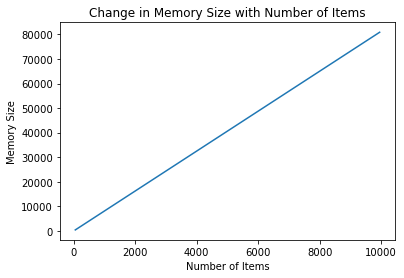

In [7]:
def items_vs_memory_size(limit):
    """
    Visualize change in memory size 
    with increasing number of items

    Parameters
    ----------
    limit: int
        the limit on number of items to test

    Returns
    -------
    None
        visualizes the relationship between the two variables
    """
    num_items = 50
    memory_sizes = []
    num_items_arr = []

    while num_items < limit:
        #create CBF
        cbf = CountingBloomFilter(num_items) 
        #track memory sizes
        memory_sizes.append(cbf.memory_size) 
        #track number of items
        num_items_arr.append(num_items) 
        #increment number of items
        num_items += 100 
    

    plt.plot(num_items_arr, memory_sizes)
    plt.xlabel("Number of Items")
    plt.ylabel("Memory Size")
    plt.title("Change in Memory Size with Number of Items")
    plt.show()

# Test up to 10k items
items_vs_memory_size(10000)

## FPR and number of hash functions

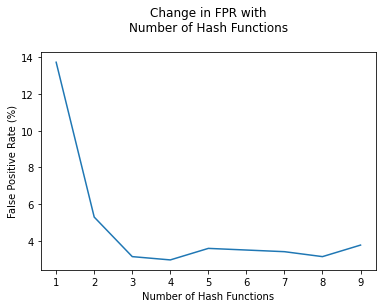

In [12]:
def hash_fns_vs_fpr(hash_fn_limit, fpr = 0.02):
    """
    Visualize change in FPR 
    with increasing number of
    hash functions

    Parameters
    ----------
    - hash_fn_limit: int
        the limit on number of hash functions to use
    - fpr: float
        the FPR to use

    Returns
    -------
    None
        visualizes the relationship between the two variables
    """
    fprs = []
    num_hash_fns_arr = []
    num_hash_fns = 1
    
    # get unique words from text
    data = list(set(version_1)) 
    num_items = len(data) // 2

    while num_hash_fns < hash_fn_limit:
        # Create CBF
        cbf = CountingBloomFilter(num_items, fpr = fpr, num_hashfn=num_hash_fns)

        # insert half the dataset to CBF
        for word in data[:num_items]:
            cbf.insert(word)

        # Search CBF using the other half of 
        # the dataset, looking for false positives
        num_false_positives = 0
        for word in data[num_items:]:
            if cbf.search(word):
                num_false_positives += 1
        
        #track fpr
        fprs.append((num_false_positives/num_items) * 100) 
        
        num_hash_fns_arr.append(num_hash_fns)
        #increment number of hash functions
        num_hash_fns += 1 
        
    plt.plot(num_hash_fns_arr, fprs)
    plt.xlabel("Number of Hash Functions")
    plt.ylabel("False Positive Rate (%)")
    plt.title("Change in FPR with\n" + \
        "Number of Hash Functions\n")
    plt.show()

hash_fns_vs_fpr(10)

## Access time to hash values and number of items with fixed FPR

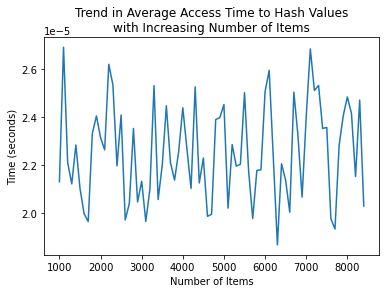

In [37]:
from time import process_time

def num_items_vs_time(data):
    """
    Visualize change in access time
    to hash values with increasing 
    number of items (at constant FPR)

    Parameter
    ----------
    - data: list
        the dataset to use

    Returns
    -------
    None
        visualizes the relationship between the two variables
    """
    times = []
    num_items_arr = []
    num_items = 1000
    data = version_1 

    # Word to search for later in the CBF
    subject = "love"

    while num_items < len(data):
        # Create CBF
        cbf = CountingBloomFilter(num_items) 

        # insert the data subset to CBF
        for word in data[:num_items]:
            cbf.insert(word)
        
        total_time = 0

        for i in range(100):
            #start time
            start_time = process_time() 
            # perform searching
            result = cbf.search(subject) 
            # substitute start time from finish time
            total_time += process_time() - start_time 
        
        # Track the average time of 100 trials 
        times.append(total_time / 100)

        # Increment the number of items
        num_items_arr.append(num_items)
        num_items += 100 # step size = 100
  
    plt.plot(num_items_arr, times)
    plt.xlabel("Number of Items")
    plt.ylabel("Time (seconds)")
    plt.title("Trend in Average Access Time to Hash Values\n with Increasing Number of Items")
    plt.show()

# Test on Version 1
num_items_vs_time(version_1)

## CBF-based plagiarism detector

In [9]:
class PlagiarismChecker():
    def __init__ (self, text_1, text_2, fpr = 0.02, phrase_size = 4):
        """
        - text_1: list, the first text file with list of words
        - text_2: list, the second text file with list of words
        - fpr: float, false-positive rate
        - phrase_size: int, how many sequence of words count as plagiarism
        """
        self.phrase_size = 4 

        # determine longer and shorter texts
        if len(text_1) > len(text_2):
            self.longer = text_1
            self.shorter = text_2
        else:
            self.longer = text_2
            self.shorter = text_1

        # define CBF
        self.cbf = CountingBloomFilter(len(self.shorter), fpr = fpr)
        self.base_text()

    def base_text(self):
        """
        Create the CBF using shorter text (hashing & inserting)
        Parameters
        ----------
        None
        
        Returns
        ----------
        None
        """
        num_words = len(self.shorter) 
        start = 0
        end = self.phrase_size
        
        # if less than phrase_size words left
        if self.phrase_size > num_words: 
            end = num_words - 1
        
        # concatenate first words into phrases
        current = "".join(self.shorter[start:end]) 
        while end < num_words:
            # insert phrase to CBF
            self.cbf.insert(current) 

            # sliding forward
            start_word_length = len(self.shorter[start])
            current = current[start_word_length:] 
            current += self.shorter[end]
            
            # Increase counters
            start += 1
            end += 1
        
        # insert last phrase to cbf
        self.cbf.insert(current) 

    def detector(self):
        """
        Detect plagiarism in the two texts using CBF
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        result: float
            the percentage of common phrases between two texts
        """
        #initialize empty common word list
        common_words = [] 
        iterations = 0 
        m = self.cbf.memory_size 
        num_words = len(self.longer)
        start = 0
        end = self.phrase_size
        
        #if less than phrase_size words left
        if self.phrase_size > num_words: 
            end = num_words - 1

        while end < num_words:
            # concatenate words into phrases
            current = "".join(self.longer[start:end])
            
            # if the current hash exists in CBF from shorter text
            if self.cbf.search(current):
                common_words.append(self.longer[start:end])
        
            # Increase counters
            start += 1
            end += 1
            it## Test caseserations += 1
        
        # Calculate % of common word detections
        result = (len(common_words) / iterations) * 100
        return (round(result,2), "% of the ", self.phrase_size, " consequtive words are overlapping.")

## Test cases

In [10]:
case1 = PlagiarismChecker(version_1, version_2)
case1.detector()

(1.87, '% of the ', 4, ' consequtive words are overlapping.')

In [11]:
#checking between version 1 and 3
case2 = PlagiarismChecker(version_1, version_3)
case2.detector()

(1.82, '% of the ', 4, ' consequtive words are overlapping.')

In [12]:
#checking between version 2 and 3
case3 = PlagiarismChecker(version_2, version_3)
case3.detector()

(2.23, '% of the ', 4, ' consequtive words are overlapping.')

In [13]:
#checking between version 1 and 1
case3 = PlagiarismChecker(version_1, version_1)
case3.detector()

(100.0, '% of the ', 4, ' consequtive words are overlapping.')

## Brute force plagiarism detector

In [10]:
def brute_force_checker(text_1, text_2, phrase_size = 4):
    """
    Detect plagiarism given two texts with a brute-force approach
    
    Parameters
    ----------
    - text_1: list, the first text file with list of words
    - text_2: list, the second text file with list of words
    - phrase_size: int, how many sequence of words count as plagiarism
    
    Returns
    ----------
    result: float
            the percentage of common phrases between two texts
    
    """
    # determine longer and shorter texts
    if len(text_1) > len(text_2):
        longer = text_1
        shorter = text_2
    else:
        longer = text_2
        shorter = text_1
    
    joined_shorter = []
    
    for i in range(len(shorter) - (phrase_size - 1)):
        # concatenate phrase_size no. of words 
        tmp = "".join(shorter[i : i + phrase_size]) 
        # create a list with phrases
        joined_shorter.append(tmp)
        
    long_start = 0
    long_end = phrase_size
    common_words = []
    iterations = 0

    while long_end < len(longer):
        # concatenate the current words into phrases
        current = longer[long_start : long_end]
        joined_longer = "".join(current)

        # search throught he phrase list of shorter text
        if joined_longer in joined_shorter:
            common_words.append(current)
        
        # redefine the phrase by sliding forward
        long_start += 1
        long_end += 1
        iterations += 1

    result = (len(common_words) / iterations) * 100
    return (round(result,2), "% of the ", phrase_size, " consequtive words are overlapping.")

## Test cases

In [11]:
text_1 = ["I", "like", "to", "eat", "apple", "every", "morning", "listening", "to", "musics"]
text_2 = ["I", "like","to", "drink", "juice", "every", "morning", "listening", "to", "musics", "and", "playing"]
brute_force_checker(text_1, text_2)

(25.0, '% of the ', 4, ' consequtive words are overlapping.')

In [12]:
brute_force_checker(version_1, version_2)

(0.0, '% of the ', 4, ' consequtive words are overlapping.')

In [13]:
brute_force_checker(version_1, version_3)

(0.0, '% of the ', 4, ' consequtive words are overlapping.')

In [14]:
brute_force_checker(version_2, version_3)

(0.0, '% of the ', 4, ' consequtive words are overlapping.')

In [15]:
brute_force_checker(version_1, version_1)

(100.0, '% of the ', 4, ' consequtive words are overlapping.')

## Comparing Complexities of plagiarism detector

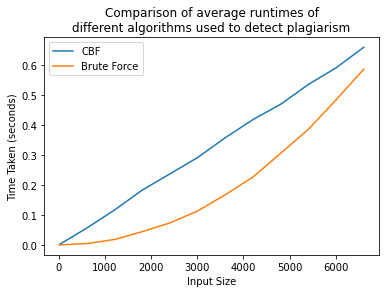

In [42]:
from time import process_time


def num_items_vs_time_all(text_1, text_2):
    """
    Compare average runtimes of the three 
    plagiarism detection methods

    Parameters
    ----------
    - text_1: list
        the text to compare with text_2
    - text_2: list
        the text to compare with text_1

    Returns
    -------
    None
        produces a #dataviz of the time complexities
    """
    cbf_times = []
    bf_times = []
    
    cbf_start_time = 0
    bf_start_time = 0

    ROUNDS = 10 # number of trials to take the average
    upper_bound = 7000 # upper bound in the number of words
    input_sizes = [i for i in range(10, upper_bound, 600)] 

    for i in input_sizes:
        # Reset the runtime counters
        cbf_total_time = 0
        bf_total_time = 0

        for _ in range(ROUNDS):
            # CBF runtime tracker
            cbf_detector = PlagiarismChecker(
                text_1[:i],
                text_2[:i],
                phrase_size=4
            )
            cbf_start_time = process_time()
            cbf_detector.detector()
            cbf_total_time += process_time() - cbf_start_time

            # brute-force runtime tracker
            bf_start_time = process_time()
            brute_force_checker(text_1[:i], text_2[:i])
            bf_total_time += process_time() - bf_start_time


        # Calculate the average runtime 
        cbf_times.append(cbf_total_time / ROUNDS)
        bf_times.append(bf_total_time / ROUNDS)

    plt.plot(input_sizes, cbf_times, label="CBF")
    plt.plot(input_sizes, bf_times, label="Brute Force")

    plt.xlabel("Input Size")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Comparison of average runtimes of" + "\n" + "different algorithms used to detect plagiarism")

    plt.legend()
    plt.show()
    
# Test on Version 1 and 2
num_items_vs_time_all(version_1, version_2)